In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pd.set_option("display.max_rows", None, "display.max_columns", None)

# Verifica **A**

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Medals.xlsx')
df

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


1\. Visualizzare il numero di medaglie d’oro vinte dall’Italia


In [ ]:
df[df['Team/NOC'] == 'Italy']['Gold']

2\. Visualizzare il numero di medaglie d’oro delle nazioni che cominciano con la lettera F


In [ ]:
df[df['Team/NOC'].str.startswith('F') == True]['Gold']

3\. Aggiungere una colonna contenente il numero totale di medaglie di ogni nazione. Chiamare la colonna “Total”


In [ ]:
df['Total'] = df['Gold'] + df['Silver'] + df['Bronze']

4\. Visualizzare la nazione che ha vinto più medaglie (in totale)


In [ ]:
df.sort_values('Total', ascending=False)['Team/NOC'][0]

5\. Visualizzare il numero totale di medaglie vinte complessivamente da tutte le nazioni


In [ ]:
df['Total'].sum()

6\. Aggiungere una colonna contenente la percentuale di medaglie vinte da ogni nazione. Chiamare la colonna “Percentuale”


In [ ]:
df['Percentuale'] = round(100 * df['Total']/df['Total'].sum(), 2)

<hr>

# Altro

* Realizzare un grafico che rappresenti la suddivisione delle medaglie per paese

<br>

##### Documentazione
🔗 [Grafico a barre in pila](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)<br>
🔗 [Grafico a barre raggruppato](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


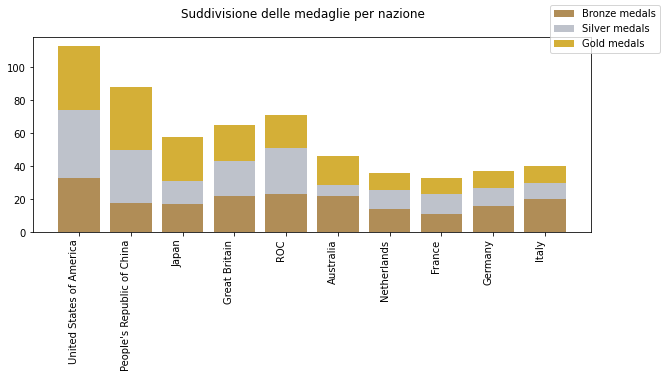

In [ ]:
data = df.head(10)

m_gold = data['Gold']
m_silver = data['Silver']
m_bronze = data['Bronze']

labels = data['Team/NOC']

# Plot
fig = plt.figure(figsize=(10,4))
ax = plt.axes()

ax.bar(labels, data['Bronze'], color='#b08d57', label='Bronze medals')
ax.bar(labels, data['Silver'], color='#bec2cb', bottom=data['Bronze'], label='Silver medals')
ax.bar(labels, data['Gold'], color='#d4af37', bottom=np.add(data['Bronze'], data['Silver']), label='Gold medals')

fig.autofmt_xdate(rotation='vertical')
fig.suptitle('Suddivisione delle medaglie per nazione')
fig.legend(loc=0)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


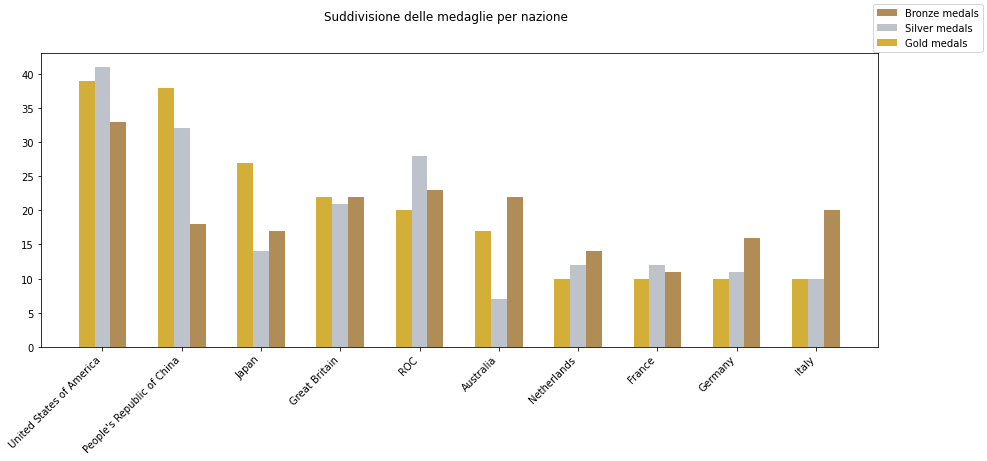

In [ ]:
data = df.head(10)

m_gold = data['Gold']
m_silver = data['Silver']
m_bronze = data['Bronze']

labels = data['Team/NOC']

x = np.arange(len(labels))    # Crea una lista di numeri interi da 0 a len(labels) - 1
width = 0.20                  # Dichiara la grandezza delle barre

## Figure and axes ##
fig = plt.figure(figsize=(15,6))   # Crea la figura
ax = plt.axes()                    # Crea gli assi

## Plot ##
# Sintassi: ax.bar(ListaDellePosizioni +/- Posizione, Dati, width=GrandezzaDelleBarre, color=Colore, label=NomePerLaLegenda)
ax.bar(x + width, data['Bronze'], width=width, color='#b08d57', label='Bronze medals')   # Crea la barra di destra
ax.bar(x, data['Silver'], color='#bec2cb', width=width, label='Silver medals')           # Crea la barra al centro
ax.bar(x - width, data['Gold'], color='#d4af37', width=width, label='Gold medals')       # Crea la barra di sinistra

fig.autofmt_xdate(rotation=45)                             # Ruota i nomi dei valori sulle ascisse di 45 gradi
fig.suptitle('Suddivisione delle medaglie per nazione')    # Imposta il titolo del grafico
fig.legend(loc=1)                                          # Crea la legenda e la posiziona nel I quadrante

ax.set_xticks(x)              # Seleziona ogni quanto visualizzare un nome sulle ascisse
ax.set_xticklabels(labels)    # Imposta la lista di nomi da visualizzare sulle ascisse

data

<hr>

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Teams.xlsx')
df

1\. Visualizzare il numero di squadre per ogni sesso

In [ ]:
df['Event'].value_counts()

2\. Visualizzare il numero di discipline a cui ha partecipato ogni nazione. Ordinare in ordine decrescente a partire dalla nazione che ha presentato più squadre. Contare insieme squadre maschili e femminili


In [ ]:
data = df.groupby('NOC', as_index=False).agg({'Event': 'count'}).sort_values('Event', ascending=False)

# Plot
fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.bar(data['NOC'], data['Event'])
fig.autofmt_xdate(rotation='vertical')
fig.suptitle('Squadre per ogni nazione')

data

3\. Visualizzare il numero di nazioni che hanno partecipato alle varie discipline. Ordinare in ordine decrescente in base alla disciplina che ha avuto più squadre partecipanti


In [ ]:
data = df.groupby('Discipline', as_index=False).agg({'NOC': 'count'}).sort_values('NOC', ascending=False)

# Plot
fig = plt.figure(figsize=(10,4))
ax = plt.axes()

ax.bar(data['Discipline'], data['NOC'])
fig.autofmt_xdate(rotation=45)
fig.suptitle('Squadre per ogni nazione suddivise in discipline')

data

4\. Visualizzare il nome della nazione che ha portato più squadre


In [ ]:
df.groupby('NOC', as_index=False).agg({'Event': 'count'}).sort_values('Event', ascending=False).values[0][0]

5\. Eliminare la colonna “Event”


In [ ]:
df = df.drop(columns=['Event'])

6\. Rinominare la colonna NOC in “Name”

In [ ]:
df.rename(columns={"NOC": "Name"})

# Verifica **B**

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/EntriesGender.xlsx')
df

1\. Visualizzare il numero di atleti maschi del nuoto

In [ ]:
df[df['Discipline'] == 'Swimming']['Male']

2\. Visualizzare le discipline con meno di 100 atleti donne


In [ ]:
df[df['Female'] <= 100]['Discipline']

3\. Aggiungere una colonna contenente il numero totale di atleti di ogni disciplina. Chiamare la colonna “Total”


In [ ]:
df['Total'] = df['Female'] + df['Male']

4\. Visualizzare la nazione che ha più atleti (in totale)


In [ ]:
# df['NOC'].values_count()[0]
# Assenza della colonna NOC

5\. Visualizzare il numero totale di atleti


In [ ]:
df['Total'].sum()

6\. Aggiungere una colonna contenente la percentuale di atleti di ogni disciplina rispetto al totale. Chiamare la colonna “Percentuale”

In [ ]:
df['Percentuale'] = round(100 * df['Total']/df['Total'].sum(), 2)

<hr>

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Coaches.xlsx')
df

1\. Visualizzare il numero di allenatori per ogni nazione. Ordinare in ordine decrescente a partire dalla nazione che ha più allenatori. 


In [ ]:
data = df['NOC'].value_counts().sort_values(ascending=False)


# Plot
fig = plt.figure(figsize=(30,12))
ax = plt.axes()

ax.bar(data.index, data)
fig.autofmt_xdate(rotation=45)
fig.suptitle('Numero di allenatori di ogni nazione')

data

2\. Visualizzare il numero di allenatori per ogni  disciplina. Ordinare in ordine decrescente in base alla disciplina in cui ci sono più allenatori


In [ ]:
data = df['Discipline'].value_counts().sort_values(ascending=False)


# Plot
fig = plt.figure()
ax = plt.axes()

ax.bar(df['Discipline'].value_counts().index, df['Discipline'].value_counts())
fig.autofmt_xdate(rotation=45)
fig.suptitle('Numero di allenatori di ogni disciplina')

data

3\. Visualizzare il nome della nazione che ha portato più allenatori

In [ ]:
df['NOC'].value_counts().sort_values(ascending=False).index[0]

4\. Visualizzare il nome delle nazioni che hanno portato più allenatori rispetto alla media 

In [ ]:
pd.Series(df['NOC'].value_counts()/df['NOC'].value_counts().sum() * 100).sort_values().index[0]

5\. Eliminare la colonna “Name”

In [ ]:
df = df.drop(columns='Name')

6\. Rinominare la colonna NOC in “Name”

In [ ]:
df.rename(columns={"NOC": "Name"})